# Project 1: Mobile application analysis 
## Team: White Walkers

### Student Names:

- Pratik Dhumal (SJSU ID: 012457185)
- Sourabh Namilikonda (SJSU ID: 012414948)
- Hrishikesh Rendalkar (SJSU ID: 011485994)
- Hemambujam Veeraraghavan (SJSU ID: 012482392)


## Business Objective and Value: 

As software engineers, we are constanly developing mobile applications as part of our course work. As part of this project, we intend to explore user experience and potential business value in the mobile application market. With the findings from this project, we intend to get a better understanding of user requirements and business opportunities in the mobile application world including:

    1. The mobile application installtion rates
    2. The Genre of the application that gain maximum user attention
    3. The android Vs apple store analysis 

These are some of the parameters we intend to gauge user experience for a given application and assess user sentiment which would help developers build application that might cater to a larger group of audience, resulting in a win-win situation for the users and the developers.






## Data Narrative

We have used two sources of data as part of this project, they include:

    1. Google app store dataset
    2. Apple app store dataset
    
These dataset have the following data on mobile applications that can be used for our analysis:

- Category of the application. Example: Gaming
- Rating of the application: Ranging between 0 to 5, 5 being the highest.
- Review count about the application: The number of times users have shown interest in reviewing the application
- Size of the application: The most critial factor of a mobile application
- Install count of the application: To gauge the number of users showing interest in the application	
- Price	of the application: The cost of the application in the app store.
- Rating of the application: To gauge the users reactions to the application
- Genres of the application: To get an idea of the user requirements in the applications market.

These are the few data points we intend to explore as part of this project. These features will lead us in the direction of finding out:

- User Requirement
- Google Vs Apple mobile application development
- New business opportunities
- Better User experience



## Data Access and Preparation

It is always better to know and understand the data on which we will be applying the algorithms. Here we are printing the names of the columns for better understanding.

In [1]:
# read data into a dataframe and assign column headers
import pandas as pd
import seaborn as sns; sns.set() 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
dfs = pd.read_excel("playstore.xlsx")
# print the dataset
print("Number of Rows and Columns::", dfs.shape)
print("\n\nFirst row printed vertically::\n", dfs.iloc[0])


Number of Rows and Columns:: (10841, 13)


First row printed vertically::
 App               Photo Editor & Candy Camera & Grid & ScrapBook
Category                                          ART_AND_DESIGN
Rating                                                       4.1
Reviews                                                      159
Size                                                         19M
Installs                                                 10,000+
Type                                                        Free
Price                                                          0
Content Rating                                          Everyone
Genres                                              Art & Design
Last Updated                                 2018-01-07 00:00:00
Current Ver                                                1.0.0
Android Ver                                         4.0.3 and up
Name: 0, dtype: object


We have data which contains alphabets and symbols such as 'NaN','+',etc. To analyze data it is important to convert that data into some meaningful format. 

In [2]:
#data purification

dataFrame=dfs[['Rating','Reviews','Size','Installs']]
dataFrame['Rating'].fillna(0, inplace = True)
#dataFrame

def purify_rating(X):
    for ind,s in enumerate(X):
        if s>5:
            print(ind, s)
            X[ind]=s/10
    return X

def purify_price(s):
    s=s.replace("Everyone","0")
    return s.replace("$","")

def purify_installs(s):
    #print(type(s) )
    s=s.replace("+","")
    s=s.replace("Free","0")
    return s.replace(",","")

def purify_size(s):
    #print(type(s) )
    s=s.replace(",","")
    s=s.replace("+","")
    s=s.replace("M","")
    s=s.replace("k","")
    return s.replace("Varies with device","0")

dataFrame['Rating']=purify_rating(dataFrame['Rating'])
dataFrame['Rating']= list(map(float, dataFrame['Rating']))

dataFrame['Installs'] = [purify_installs(str(s)) for s in dataFrame['Installs']]
dataFrame['Installs'] = list(map(float, dataFrame['Installs']))

dataFrame['Size'] = [purify_size(str(s)) for s in dataFrame['Size']]
dataFrame['Size'] = list(map(float, dataFrame['Size']))

dataFrame

,Rating,Reviews,Size,Installs
0,4.1,159,19.0,10000.0
1,3.9,967,14.0,500000.0
2,4.7,87510,8.7,5000000.0
3,4.5,215644,25.0,50000000.0
4,4.3,967,2.8,100000.0
5,4.4,167,5.6,50000.0
6,3.8,178,19.0,50000.0
7,4.1,36815,29.0,1000000.0
8,4.4,13791,33.0,1000000.0
9,4.7,121,3.1,10000.0


## First data enrichment

As part of First data Enrichment, based on the sentiment analysis of the reviews on the dataset, we have introducded a new column that would depict the probability of the application being downloaded by the users. This data enrichement plays a crucial role in analysing:

- The average User Reviews for a given application
- The number of installs of an application
- The average user rating for the application

Thus justifying the "*Probablity of Downloading*" as our first data enrichment

We have added one more column of probability downloading which consists of values such as 'No' and 'Yes'

In [3]:
def addNewColumnForBoolean(installs,size,reviews,rating):
    if installs > 10000 and size < 30 and reviews > 1500 and rating > 4.4:
        val = 'Yes'
    else:
        val = 'No'
    return val
list_value=[]
for index, row in dataFrame.iterrows():
    list_value.append(addNewColumnForBoolean(row['Installs'],row['Size'],row['Reviews'],row['Rating']))
   
    
dataFrame['Probability_Downloading']=list_value

In [5]:
y=dataFrame['Probability_Downloading']
#adding some randomness to the dataset to make it more realistic

for i in range(0, dataFrame.shape[0]):
    if dataFrame.iloc[i]['Installs']>10000 and dataFrame.iloc[i]['Size'] < 30 and dataFrame.iloc[i]['Reviews'] > 1500 and dataFrame.iloc[i]['Rating'] > 4.4:
        if i%7==0:
            dataFrame.loc[i,'Probability_Downloading']='No'
    else:
        if i%7==0:
            dataFrame.loc[i,'Probability_Downloading']='Yes'
            
   # print(str(index) +" "+ row['Probability_Downloading']+" "+y)
y=dataFrame['Probability_Downloading'] 

## Second data enrichment

The Second data enrichment we used as part of this project was to compare the dataset of both google and apple and find those applications that are common in both the app stores. And we decuded:

 - Common Applications on both platforms
 - Genre of the common applications
 - User rating for the application on both the stores

In [6]:
xl = pd.ExcelFile("playstore.xlsx")
df = xl.parse("Sheet1")
df.head()

,Google Vs Apple,Genre,Google Rating,Apple Rating
0,Infinite Painter,Productivity,4.1,4.0
1,Indeed Job Search,Business,4.3,4.0
2,Uber Driver,Business,4.4,3.0
3,ADP Mobile Solutions,Business,4.3,4.0
4,WhatsApp Messenger,Social Networking,4.4,4.5


## Insights after enrichment:

With the data enrichments to the given dataset, we now intend to find the minimum, maximum and average of:

    -Ratings
    -Installs
    -App Size
    -Reviews
    
These will give proper, clearer insights to the dataset afer enrichment and would help us in our business usecase.

In [7]:
print("Average, Max and min Rating:", str(round(dataFrame['Rating'].mean(), 2)), str(round(dataFrame['Rating'].max(),2)), str(round(dataFrame['Rating'].min(),2)))
print("Average, Max and min Installs:", str(round(dataFrame['Installs'].mean())), str(round(dataFrame['Installs'].max())), str(round(dataFrame['Installs'].min())))
print("Average, Max and min Size:", str(round(dataFrame['Size'].mean())), str(round(dataFrame['Size'].max())), str(round(dataFrame['Size'].min())))
print("Average, Max and min Reviews:", str(round(dataFrame['Reviews'].mean())), str(round(dataFrame['Reviews'].max())), str(round(dataFrame['Size'].min())))
print("Result good for:", str(round(dataFrame.loc[dataFrame['Probability_Downloading'] == 'Yes'].shape[0])), ", bad for:", str(round(dataFrame.loc[dataFrame['Probability_Downloading'] == 'No'].shape[0])))

Average, Max and min Rating: 3.62 5.0 0.0
Average, Max and min Installs: 15462913 1000000000.0 0.0
Average, Max and min Size: 31 1020.0 0.0
Average, Max and min Reviews: 444112 78158306 0.0
Result good for: 2428 , bad for: 8413


In [8]:
print ("The Most installed app in comparision to both Google and Apple mobile store is: ")
print("\nMaximum installed app is:\n",dfs.iloc[dataFrame['Installs'].idxmax()])

The Most installed app in comparision to both Google and Apple mobile store is: 

Maximum installed app is:
 App                 Google Play Books
Category          BOOKS_AND_REFERENCE
Rating                            3.9
Reviews                       1433233
Size               Varies with device
Installs               1,000,000,000+
Type                             Free
Price                               0
Content Rating                   Teen
Genres              Books & Reference
Last Updated      2018-08-03 00:00:00
Current Ver        Varies with device
Android Ver        Varies with device
Name: 152, dtype: object


### Cross Tabulation:

Perform cross tabulation to visualize how for given condition of one column the number of instances of the other column exists along with the probability

For better understanding we will construct a table with no. of installs and the probability of that app getting downloaded. 

In [9]:
#Cross tabulation stats
print("First frequency:")
pd.crosstab(dataFrame['Installs'],dataFrame['Probability_Downloading'],margins=True)


First frequency:


Probability_Downloading,No,Yes,All
Installs,,,
0.0,12,3,15
1.0,56,11,67
5.0,73,9,82
10.0,328,58,386
50.0,176,29,205
100.0,626,93,719
500.0,284,46,330
1000.0,763,145,908
5000.0,409,68,477


In [10]:
### normalize
print("Second precentage(normalized):")
pd.crosstab(dataFrame['Installs'],dataFrame['Probability_Downloading'],normalize='index', margins=True)

Second precentage(normalized):


Probability_Downloading,No,Yes
Installs,,
0.0,0.800000,0.200000
1.0,0.835821,0.164179
5.0,0.890244,0.109756
10.0,0.849741,0.150259
50.0,0.858537,0.141463
100.0,0.870654,0.129346
500.0,0.860606,0.139394
1000.0,0.840308,0.159692
5000.0,0.857442,0.142558


### Data Visualization Techniques:

To get a better understanding of the dataset after enrichment, we use the following techniques:

#### 1. Frequency plots
#### 2. Histograms
#### 3. Heatmaps
#### 4. Pair plotting
#### 5. Bivariate relationships

To plot the Frequency we are taking no. of installs on x-axis and count of apps on y-axis. This helps us understand how many apps were installed how many times.

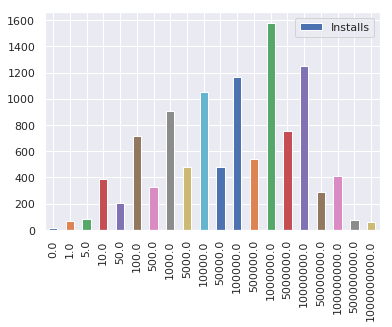

In [11]:
#Frequency plots
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax1 = dataFrame['Installs'].value_counts().sort_index(ascending=True).plot('bar', ax=ax, legend=True)
plt.show()

Here we are replacing x-axis with the ratings. so we can find out how many apps got a particular rating in general

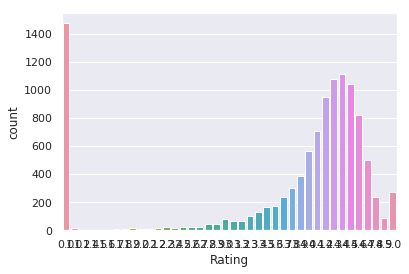

In [12]:
#Frequency plots
import seaborn as sns
sns.countplot(x="Rating", data=dataFrame)
plt.show()

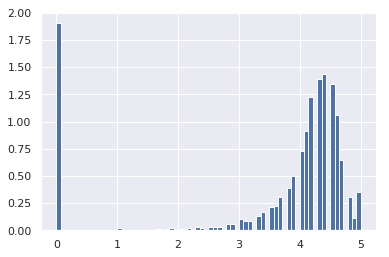

In [13]:
# Histograms
plt.hist(dataFrame['Rating'],density=1, bins=70)
plt.show()

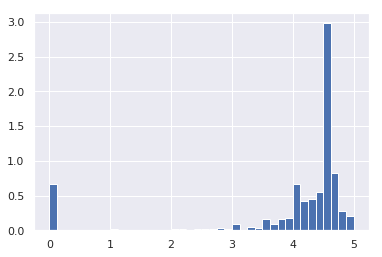

In [14]:
plt.hist(dataFrame[dataFrame['Probability_Downloading']=='Yes']['Rating'],density=1, bins=40)
plt.show()

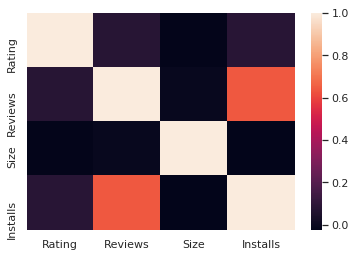

In [15]:
#Heat maps
sns.heatmap(dataFrame.corr())
plt.show()

### Higher density is darker

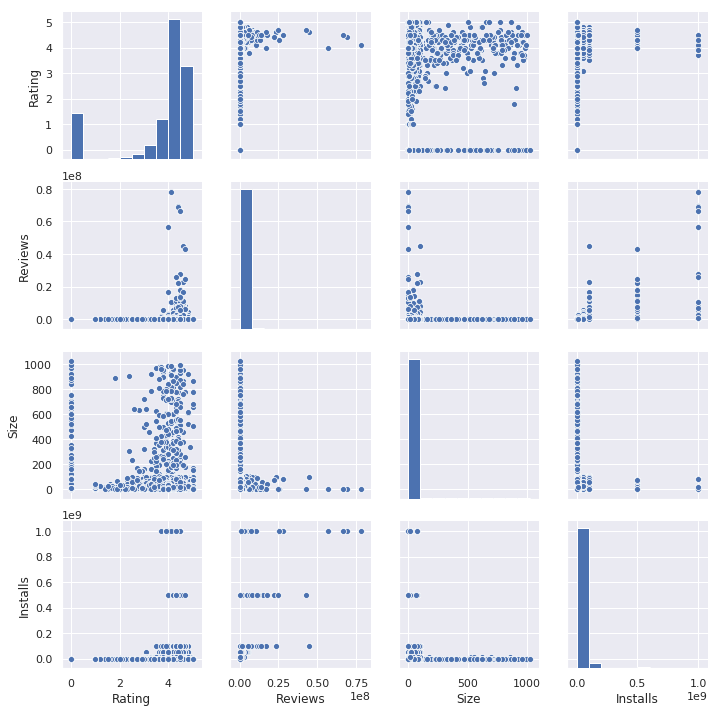

In [16]:
#Now pair plotting
# Create the default pairplot
sns.pairplot(dataFrame)

### Gives us single glance visualization 

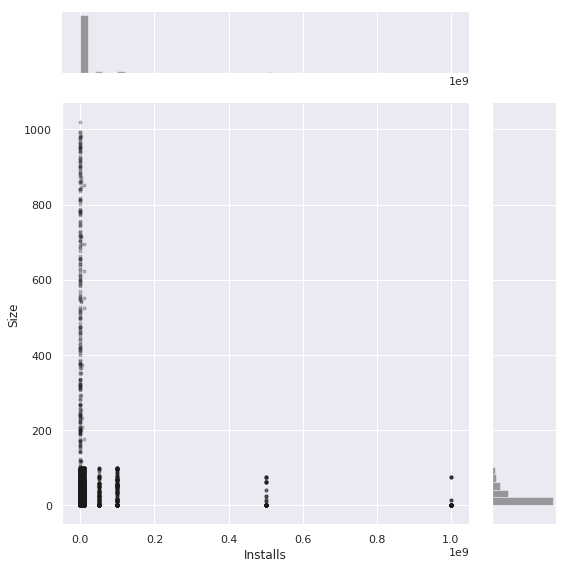

In [17]:
#Bivariate relationships
sns.jointplot(x='Installs', y='Size',data=dataFrame, size=8, alpha=.25, color='k', marker='.')
plt.tight_layout()

# Step 3. Scatter plot and clustering (unsupervised analysis)

We are taking rating on x-axis and size on y-axis. This helps us understand that the apps which have 3.0+ rating are less in size. 

(10841, 4)


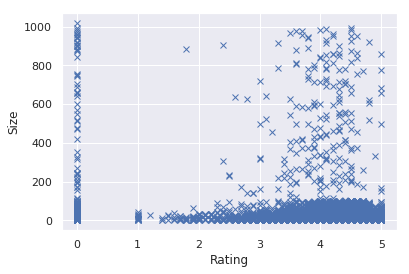

In [18]:
### Y_Output is the result column (dependent variable)
### X_Input is our independent variables all the other columns
import numpy as np
Y_Output= np.array(dataFrame['Probability_Downloading'])
X_Input = np.array(dataFrame.drop(['Probability_Downloading'], axis=1))
print(X_Input.shape)
### Has 1000 rows and 24 columns

#normal scatter plot try for multiple columns
plt.xlabel('Rating')
plt.ylabel('Size')
plt.plot(X_Input[:,0], X_Input[:,2],'bx')
plt.show()



### Age in years vs Credit amount

### KMeans

We are taking rating on x-axis and size on y-axis. We are taking the k value as 6 so that we can group the size of apps and ratings in such a way that we can visualize the chunks of rating and size relationship.

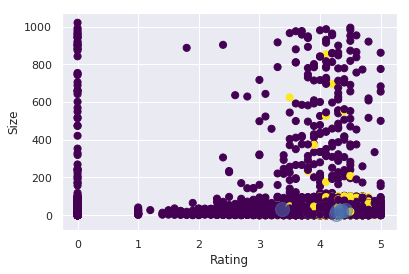

In [19]:
#KMeansimport numpy as np
import seaborn as sns; sns.set()  # for plot styling
from sklearn.cluster import KMeans

### try for multiple n values

kmeans = KMeans(n_clusters=6)
kmeans.fit(X_Input)
y_kmeans = kmeans.predict(X_Input)
plt.scatter(X_Input[:, 0], X_Input[:, 2], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.xlabel('Rating')
plt.ylabel('Size')
plt.scatter(centers[:, 0], centers[:, 2],  s=200, alpha=0.5);

We are using this elbow method to find optimal value of k to cluster by.

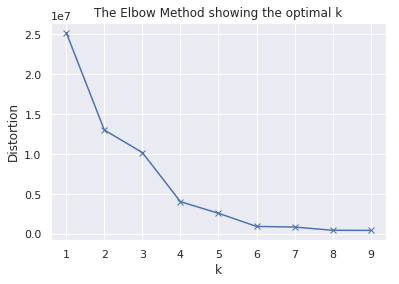

In [20]:
# k means determine k Elbow method
from scipy.spatial.distance import cdist
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_Input)
    kmeanModel.fit(X_Input)
    distortions.append(sum(np.min(cdist(X_Input, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_Input.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### Thus the Elbow  method gives less variation when k ==5 so that is the optimal cluster value

## GMM (Soft Clustering probabilistic in nature)

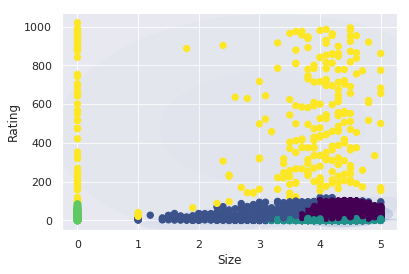

In [21]:
#GMM
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
        """Draw an ellipse with a given position and covariance"""
        ax = ax or plt.gca()
    
    # Convert covariance to principal axes
        if covariance.shape == (2, 2):
            U, s, Vt = np.linalg.svd(covariance)
            angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
            width, height = 2 * np.sqrt(s)
        else:
            angle = 0
            width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
        for nsig in range(1, 4):
            ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
    
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('auto')

    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)
        
X_Input_temp= X_Input[:, [0, 2]]
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5).fit(X_Input_temp)
labels = gmm.predict(X_Input_temp)
plt.xlabel('Size')
plt.ylabel('Rating')
gmm = GaussianMixture(n_components=5, covariance_type='full', random_state=2)
plot_gmm(gmm, X_Input_temp)

#### Clustering helps us see how data is naturally grouped so that we can apply labelled classification more intuitively

## Step 4. Classification (into classes) and Regression (for continuous values)
Below we will be finding the accuracy of different algortihms with respect to our dataset.

### Simple Linear Regression for 2 columns

We are taking rating on x-axis and size on y-axis. The line divides the graph into two parts. So the black dots are the testing data and the blue line is the prediction of the test data

Train rows (7588,) (7588,)
Test rows (3253,) (3253,)
Intercept(constants):  [37.59690653]
Coefficients(Slopes):  [[-1.61708092]]
Variance score: -3492.684689261356
Mean squared error: 7410.60
R squared : -0.00
Mean absolute error: 33.43


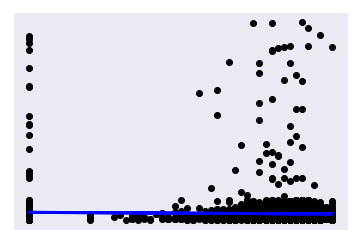

In [23]:
#simple Linear Regression
#train test split
X_Input_temp= X_Input[:, [0, 2]]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_Input_temp[:,0], X_Input_temp[:,1], test_size=0.3, random_state=1)
print("Train rows", X_train.shape, y_train.shape)
print("Test rows",X_test.shape, y_test.shape)

X_train = np.array(X_train)
X_train = X_train.reshape((len(X_train), 1))
X_test = np.array(X_test)
X_test = X_test.reshape((len(X_test), 1))
y_train = np.array(y_train)
y_train = y_train.reshape((len(y_train), 1))
y_test = np.array(y_test)
y_test = y_test.reshape((len(y_test), 1))


from sklearn import datasets, linear_model, metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score

reg = linear_model.LinearRegression() 

# Train the model using the training sets
reg.fit(X_train, y_train) 

# Make predictions using the testing set
y_pred = reg.predict(X_test)

print('Intercept(constants): ', reg.intercept_)
print('Coefficients(Slopes): ', reg.coef_)
print('Variance score: {}'.format(reg.score(y_test, y_pred)))
print("Mean squared error: %.2f" %mean_squared_error(y_test, y_pred))
print("R squared : %.2f" %r2_score(y_test, y_pred))
print("Mean absolute error: %.2f" %mean_absolute_error(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

#### Based on the above visualization, we can conclude that linear regression might not be a good fit for our dataset. We will now explore other algorithms below for attaining better precision and accuracy.

## Trying for multiple columns together (multiple linear regression)

We will be splitting the data into 30% and 70%. 30% for testing the data and 70% for training the data.

In [25]:
#train test split
from sklearn.model_selection import train_test_split
X_Input = dataFrame.drop('Probability_Downloading', 1)
Y_Output = dataFrame['Probability_Downloading']
Y_Output=Y_Output.replace('Yes',1)
Y_Output=Y_Output.replace('No',0)
X_train, X_test, y_train, y_test = train_test_split(X_Input, Y_Output, test_size=0.3, random_state=1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

from sklearn import datasets, linear_model, metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

reg = linear_model.LinearRegression() 

# Train the model using the training sets
reg.fit(X_train, y_train) 

coeff_df = pd.DataFrame(reg.coef_, X_Input.columns, columns=['Coefficient'])  
print(coeff_df)  

# Make predictions using the testing set
y_pred = reg.predict(X_test)

df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
print(df1)
print("R squared : %.2f" %r2_score(y_test, y_pred))
print("Mean squared error: %.2f" %mean_squared_error(y_test, y_pred))
print("Mean absolute error: %.2f" %mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error: %.2f ' %np.sqrt(mean_squared_error(y_test, y_pred)))

(7588, 4) (7588,)
(3253, 4) (3253,)
           Coefficient
Rating    3.303910e-02
Reviews   3.877959e-09
Size     -1.789920e-04
Installs -1.405303e-10
       Actual  Predicted
4970        1   0.201707
7351        0   0.251632
6868        0   0.108225
3407        0   0.246485
4324        0   0.231835
691         0   0.218169
6733        0   0.104681
10316       0   0.260168
7709        0   0.253132
6498        0   0.229736
6571        1   0.255250
7647        0   0.247818
3253        1   0.260082
4276        0   0.263651
793         1   0.267152
1201        0   0.250928
10344       0   0.108655
1124        0   0.237181
2517        0   0.193827
10002       0   0.108977
4695        1   0.266919
3601        0   0.236825
9190        0   0.106650
4060        1   0.236738
8229        0   0.181647
7967        0   0.246459
2676        0   0.244729
9142        1   0.256353
5156        0   0.236300
2217        0   0.225013
...       ...        ...
8678        0   0.250141
3964        0   0.238173

#### So for all the columns combined in Linear regression the R2 value is very low and hence the linear model is not a good fit

## Logistic regression (along with PCA)
### Based on some experimentation we found a few columns using which we get best optimization

With Logistic regression we are getting our precision value as around 61%. Along with precision we are also calculating the Mean squared error, Mean absolute error, Root Mean Squared Error. We have plotted PC1 with all columns except probability downloading and PC2 as probability downloading

Classification Report              precision    recall  f1-score   support

          0       0.78      1.00      0.87      2537
          1       0.00      0.00      0.00       716

avg / total       0.61      0.78      0.68      3253

Confusion matrix:
 [[2528    9]
 [ 716    0]]
Mean squared error: 0.22
Mean absolute error: 0.22
Root Mean Squared Error: 0.47 


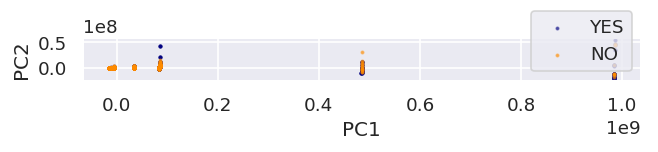

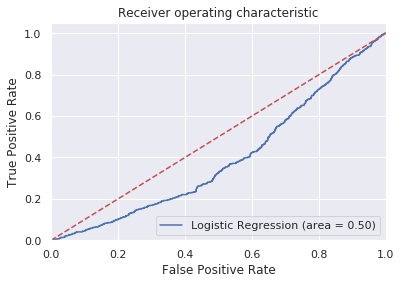

In [39]:
# logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
BinaryResult=Y_Output

Features= dataFrame[['Installs','Size','Rating', 'Reviews']]
X_train, X_test, y_train, y_test = train_test_split(Features, BinaryResult, test_size=0.30, random_state=101)
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
print("Classification Report", classification_report(y_test,predictions))
cnfmtx=confusion_matrix(y_test,predictions)
print("Confusion matrix:\n",cnfmtx)

print("Mean squared error: %.2f" %mean_squared_error(y_test, y_pred))
print("Mean absolute error: %.2f" %mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error: %.2f ' %np.sqrt(mean_squared_error(y_test, y_pred)))

#PCA and plotting
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit_transform(Features)
X_train1, X_test1, y_train1, y_test1 = train_test_split(pca, BinaryResult, random_state=0)

plt.figure(dpi=120)
plt.scatter(pca[BinaryResult.values==0,0], pca[BinaryResult.values==0,1], alpha=0.5, label='YES', s=2, color='navy')
plt.scatter(pca[BinaryResult.values==1,0], pca[BinaryResult.values==1,1], alpha=0.5, label='NO', s=2, color='darkorange')
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.gca().set_aspect('equal')
plt.show()

# ROC should be as far away from red line towards top left
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Logstic regression output explanation
PC1 vs PC2
PC1 has all the other columns condensed into 1 and PC2 has the result column

As we cannot observe more than 3 or 4 dimensions simultaneously, we can use PCA to reduce the number of features to easily plot on a lower dimension graph

##### Receiver operating characteristc:
Here the blue line should be as far away from the red line as possible to reduce the false positive rate.
Hence this regression is giving us pretty good results

### Naive Bayesian

With Naive bayes algorithm we are getting precision of around 70%. We are splitting the data as 70% training data and 30% testing data. 

In [40]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
gnb = GaussianNB()
x=dataFrame.drop(['Probability_Downloading'], axis=1)
y=BinaryResult
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
gnb.fit(x,y)
y_pred = gnb.predict(x_test)
print(classification_report(y_test,y_pred))
cnfmtx=confusion_matrix(y_test,y_pred)
print("Confusion matrix:\n",cnfmtx)


print("Mean squared error: %.2f" %mean_squared_error(y_test, y_pred))
print("Mean absolute error: %.2f" %mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error: %.2f ' %np.sqrt(mean_squared_error(y_test, y_pred)))
print('Accuracy :', accuracy_score(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.78      1.00      0.88      2543
          1       0.30      0.00      0.01       710

avg / total       0.68      0.78      0.69      3253

Confusion matrix:
 [[2536    7]
 [ 707    3]]
Mean squared error: 0.22
Mean absolute error: 0.22
Root Mean Squared Error: 0.47 
Accuracy : 0.7805102981862896


### Explanation of Naive Bayesian
#### Here feature independence is assumed althought that might not be the case
#### The output shows thw Classification report with about 67% precision, 77% recall and 67% F1 score
#### Accuracy is pretty high here 


# Decision Tree Classification

Accuracy score is:
0.8529276164130936


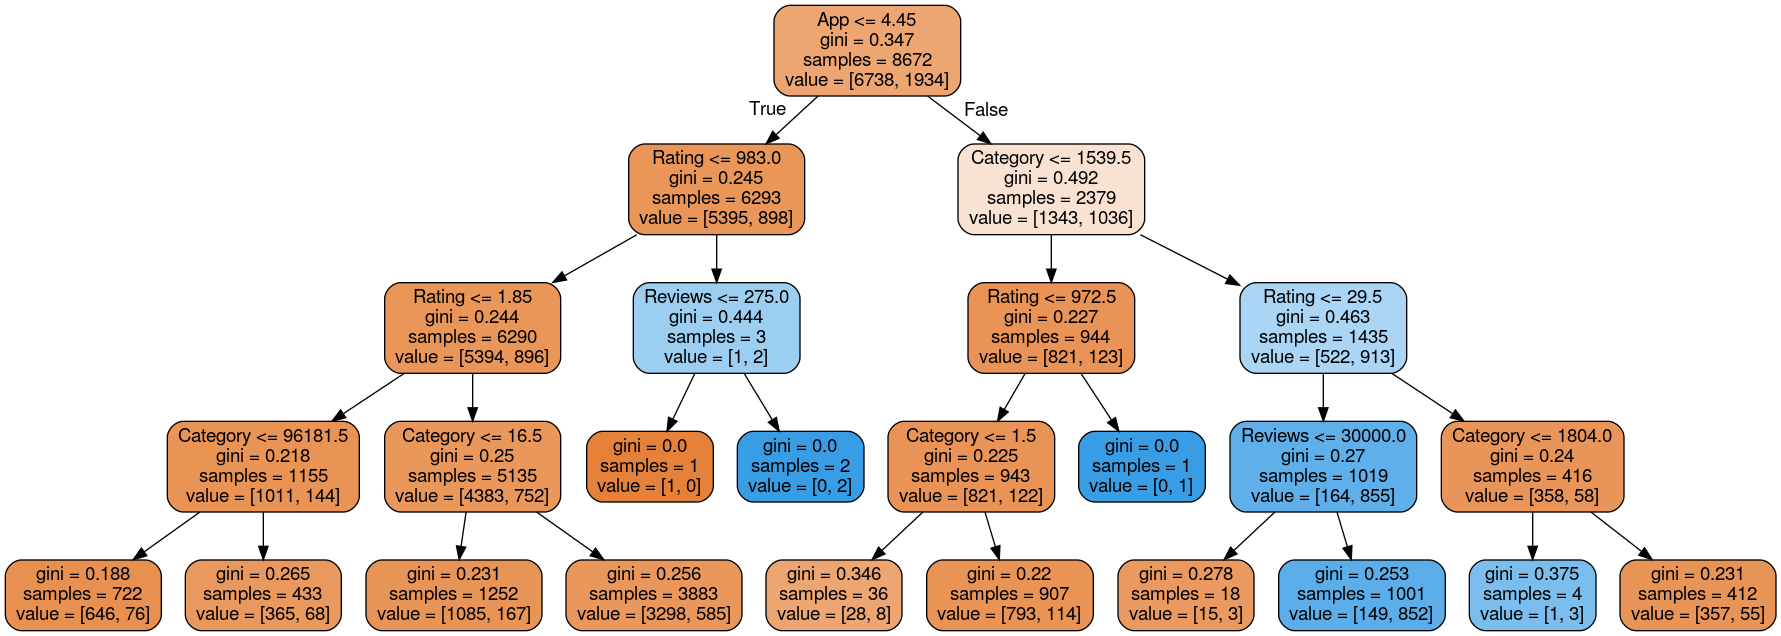

In [41]:
#Decision tree
from IPython.display import Image  
from sklearn.externals.six import StringIO
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import pydot
dot_data = StringIO()  
dtree=DecisionTreeClassifier(max_depth=4)
features = list(dfs.columns[0:4])
x=dataFrame.drop(['Probability_Downloading'], axis=1)
y=dataFrame['Probability_Downloading']

#x_temp=x.head(500)
#y_temp=y.head(500)
#x
#y
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
dtree.fit(x_train,y_train)
y_pred=dtree.predict(x_test)
print('Accuracy score is:')
print(accuracy_score(y_test,y_pred))

#we need pass features columns and dtree to graphviz 
export_graphviz(dtree,out_file=dot_data,feature_names=features,filled=True,rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png()) 

### Explanation of decision tree
### Here the entire decision tree has been plotted and it seems to be very wide and deep with about 85% accuracy

# Random Forest

With Random forest we are getting accuracy of around 82%. Also the garph below explains the impostance of different attributes such as Reviews,Size,Rating and Installs.  

             precision    recall  f1-score   support

          0       0.85      0.94      0.89      2530
          1       0.66      0.41      0.50       723

avg / total       0.81      0.82      0.81      3253

Confusion matrix:
 [[2378  152]
 [ 428  295]]
Mean squared error: 0.18
Mean absolute error: 0.18
Root Mean Squared Error: 0.42 
Accuracy  0.821703043344605
Variable: Reviews              Importance: 0.37
Variable: Size                 Importance: 0.3
Variable: Rating               Importance: 0.23
Variable: Installs             Importance: 0.1


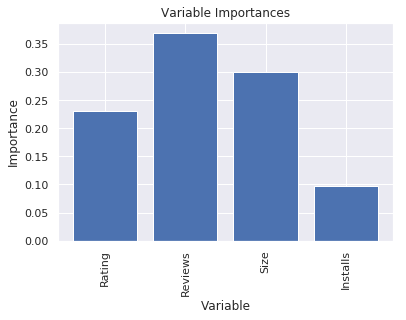

In [42]:
#Random Forest
from sklearn.metrics import accuracy_score 
from sklearn.ensemble import RandomForestClassifier
from numpy.core.umath_tests import inner1d
#import graphviz
#import pydotplus

x=dataFrame.drop(['Probability_Downloading'], axis=1)
y=BinaryResult
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)
rfc_pred=rfc.predict(x_test)
print(classification_report(y_test,rfc_pred))
cnfmtx=confusion_matrix(y_test,rfc_pred)
print("Confusion matrix:\n",cnfmtx)

print("Mean squared error: %.2f" %mean_squared_error(y_test, rfc_pred))
print("Mean absolute error: %.2f" %mean_absolute_error(y_test, rfc_pred))
print('Root Mean Squared Error: %.2f ' %np.sqrt(mean_squared_error(y_test, rfc_pred)))
print("Accuracy ",accuracy_score(y_test,rfc_pred))

#plot 1 tree
features = list(dataFrame.columns[0:4])
tree = rfc.estimators_[5]
export_graphviz(tree, out_file = 'tree.dot', feature_names = features, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('tree.dot')
Image(graph.create_png())


#get important features
# Get numerical feature importances
importances = list(rfc.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(features, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

#plot important features
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

### Random forest explanation
### Accuracy of about 82 % is achieved here using all the features.
### Also printed is the importance of individual features
### To reduce the pressing cost we have used only the 2 most important features in the next cell
### This gives better performance with comparable accuracy

In [43]:
# New random forest with only the two most important variables
rf_most_important = RandomForestClassifier(n_estimators= 1000, random_state=42)
# Extract the two most important features
important_indices = [features.index('Reviews'), features.index('Size')]
train_important = np.array(x_train)[:, important_indices]
test_important = np.array(x_test)[:, important_indices]
# Train the random forest
rf_most_important.fit(train_important, y_train)
# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
# Display the performance metrics
print(classification_report(y_test,predictions))
cnfmtx=confusion_matrix(y_test,predictions)
print("Confusion matrix:\n",cnfmtx)

print("Mean squared error: %.2f" %mean_squared_error(y_test, predictions))
print("Mean absolute error: %.2f" %mean_absolute_error(y_test, predictions))
print('Root Mean Squared Error: %.2f ' %np.sqrt(mean_squared_error(y_test, predictions)))
print("Accuracy ",accuracy_score(y_test,predictions))

             precision    recall  f1-score   support

          0       0.80      0.88      0.84      2530
          1       0.37      0.25      0.30       723

avg / total       0.71      0.74      0.72      3253

Confusion matrix:
 [[2221  309]
 [ 544  179]]
Mean squared error: 0.26
Mean absolute error: 0.26
Root Mean Squared Error: 0.51 
Accuracy  0.7377805102981863


#### Here despite reduction in accuracy this can be used as it requires much less processing

# SVM

With SVM we are getting precision as around 72%. The cost of confusion matrix is 3569.

In [44]:
#SVM
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
x=dataFrame.drop(['Probability_Downloading'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)
model = SVC()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(classification_report(y_test,predictions))
cnfmtx=confusion_matrix(y_test,predictions)
print("Confusion matrix:\n",cnfmtx)

print("Mean squared error: %.2f" %mean_squared_error(y_test, predictions))
print("Mean absolute error: %.2f" %mean_absolute_error(y_test, predictions))
print('Root Mean Squared Error: %.2f ' %np.sqrt(mean_squared_error(y_test, predictions)))
print("Accuracy ",accuracy_score(y_test,predictions))

             precision    recall  f1-score   support

          0       0.78      0.98      0.87      2532
          1       0.44      0.05      0.09       721

avg / total       0.71      0.78      0.70      3253

Confusion matrix:
 [[2488   44]
 [ 686   35]]
Mean squared error: 0.22
Mean absolute error: 0.22
Root Mean Squared Error: 0.47 
Accuracy  0.7755917614509683


### Explanation of SVM 
### This is another good example with good accuracy in the model

# KNN

With KNN we are getting precision value of 70%. we are also plotting graph of error rate Vs. K value for better visualization.

             precision    recall  f1-score   support

          0       0.78      0.97      0.87      2775
          1       0.40      0.06      0.11       803

avg / total       0.70      0.77      0.70      3578

Confusion matrix:
 [[2701   74]
 [ 753   50]]
Mean squared error: 0.23
Mean absolute error: 0.23
Root Mean Squared Error: 0.48 


Text(0,0.5,'Error Rate')

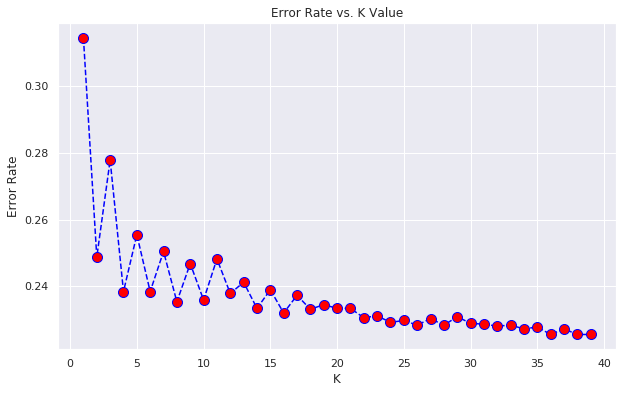

In [45]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
x=dataFrame.drop(['Probability_Downloading'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
knn=KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print(classification_report(y_test,pred))
cnfmtx=confusion_matrix(y_test,pred)
print("Confusion matrix:\n",cnfmtx)

print("Mean squared error: %.2f" %mean_squared_error(y_test, pred))
print("Mean absolute error: %.2f" %mean_absolute_error(y_test, pred))
print('Root Mean Squared Error: %.2f ' %np.sqrt(mean_squared_error(y_test, pred)))


#elbow for knn
error_rate=[]  
for i in range (1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))

#plotting
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### Explanation of KNN
#### Here depending on k value we can see how the error rate is fluctuating
#### This model can be used effectively to guage the result of an individual case 

# Overall explanation of the solution
- ### So here we used multiple visualization tools to observe the data to gain insights
- ### Clustered the unsupervised data to find out which data can be used to for supervised modelling.
- ### Applied multiple classification and regression techniques to build a model which can classify data into Good or Bad probability.
- ### Compared the accuracy, precision and loss derieved from each of them

## Upon Observing the various models the following conclusions can be drawn:

- ### By simple observations we found that Google Play Books was the most installed application.
- ### By observing the applications we found that only about 25% of the apps have wide spread application with good ratings, reviews and small size and are recommended.
- ### No of installs increases by approximately 10-15% when the app size is between 100000 and 100000000
- ### A high frequency of apps are rated between 3.2 to 4.6
- ### Roughly the apps can be grouped into 5 categories optimally without any further input
- ### Using various algorithms we came to know that Random Forest and SVM have best performance for this particular dataset with approx accuracy of 75%.
- ### Decision trees and Random forests are hepling us visualize the most prominent factors upon which the data is being decided. Most important factors are: 
  'Reviews'> 'Size'> 'Ratings'> 'Installs'
- ### KNN gives maximum error if using only 2 neighbours to classify any given data point and steadily becomes better after considering more data point neighbours.



# Business Solution

### Based on comparing the enriched dataset of google and apple applications,  we could decipher:

- ### Building an android application is set to reach a larger audience
- ### Entertainment is the most popular Genre of applications.
- ### Building new android application for entertainment would be a good business opportunity
- ### It goes without saying that the application has be precise and clean for better reviews at the apple app store.
- ### The difference in rating in rating between google and apple for the same application e.g MTV. This might be a good area for business improvement


## These are some of the conclusion which might be helpful to a Mobile Developer in analysing the data and maximizing  profits

## Github Link
https://github.com/sourabhnamilikonda/257-ML-White-Walkers


### Individual Resposibilities
- #### Sourabh Namilikonda - Dataset exploration and preparation, K Means Clustering, Latent Manifold and Regression, Data Visualiztion - Cross Tabulation, data insights investigations.
- #### Hemambujam Veeraraghavan - Data exploration and enrichment 2, PC1 vs PC2, GMM and Heirarchial, Data visualization - Frequency Plot, data insights investigations.
- #### Pratik Dhumal - Data exploration and enrichment 1, Decision tree, Random forest, Data Visualiztion - Histograms, Interpretation of algorithms
- #### Hrishikesh Rendalkar - Data exploration and narrative, Linear Regression, Naive Bayes, Data Visualization - Heatmap, Metric assessment
